Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [7]:
median_mpg = mpg %>% 
      group_by(class) %>%
        summarize(cty = median(cty)) %>%
            arrange(cty) %>%
                mutate(class = fct_inorder(class))
median_mpg
# He didn't use *median_cty* like I previously did, he actually kept cty because he intentionally wants it to overlap when you combine the two plots

class,cty
<fct>,<dbl>
pickup,13
suv,13
2seater,15
minivan,16
midsize,18
subcompact,19
compact,20


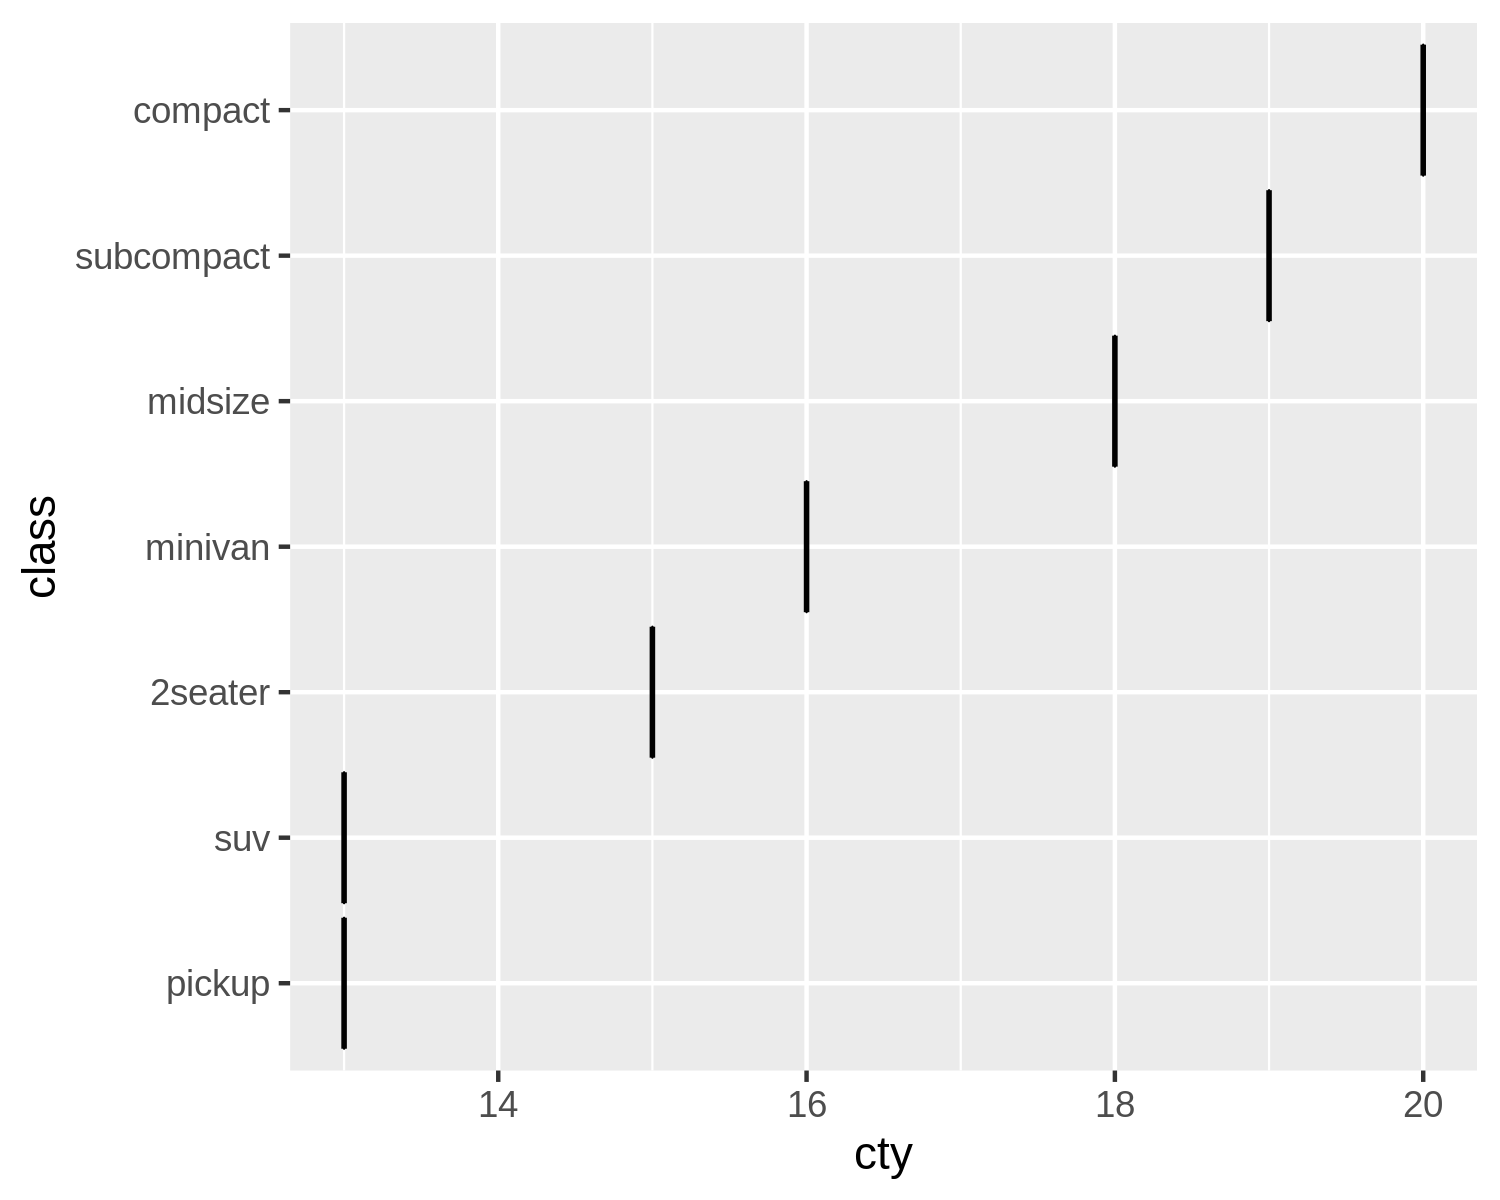

In [10]:
p = ggplot(median_mpg, aes( x = cty, y = class))

p = p + geom_crossbar(mapping = aes(xmin= cty, xmax = cty), lwd = 0.25) #lwd = line width

p

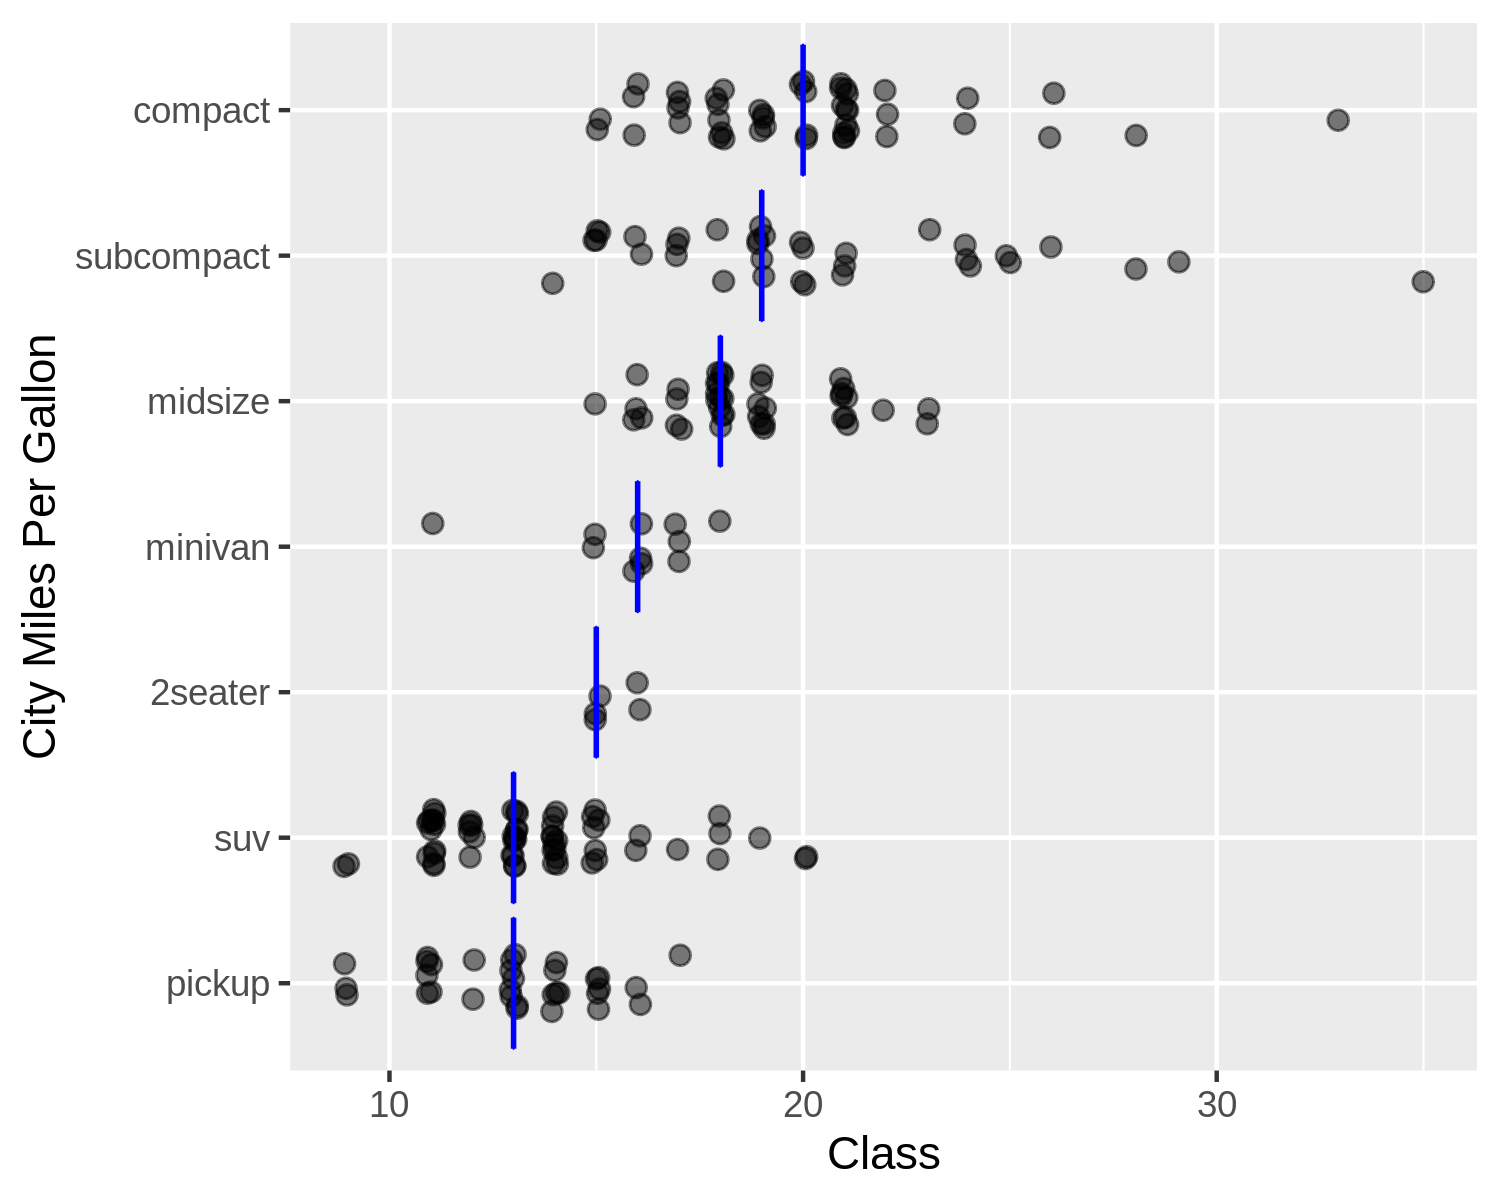

In [16]:
p = ggplot(median_mpg, aes( x = cty, y = class))

p = p + geom_point(data = mpg %>% mutate(class = fct_reorder(class, cty, median)) # This is key because when I had put geom_cross first the order was correct
                   #But when I put geom_point the order was back to the default, so we added this line to change the order of the categories
                   , position = position_jitter(h = 0.2, w = 0.1), size = 2, alpha = 0.5)

p = p + geom_crossbar(mapping = aes(xmin= cty, xmax = cty), lwd = 0.25, color = 'blue') #lwd = line width

p = p + labs(x = 'Class', y = 'City Miles Per Gallon')

# p = p + geom_crossbar(median_mpg,) 
p

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`